In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import glob
sys.path.append("../../code")
sys.path.append("../../analysis")

In [3]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
import loaders.losaltos as lla

In [5]:
data_dir = os.path.join("../../data/clean_data/")

In [6]:
ripa2023 = lla.load_ripa_data(glob.glob(os.path.join(data_dir, "LAPD_RIPA_DATA*.csv")), dir=".")

In [7]:
def simplify_race(race):
    if race.lower() in ["white", "asian", "black", "hispanic", "other"]:
        return race
    elif "black" in race.lower():
        return "Black"
    elif "hispanic" in race.lower():
        return "Hispanic"
    elif "asian" in race.lower():
        return "Asian"
    else:
        return "Other"

In [8]:
def simplify_outcome(outcome):
    if outcome == "No Action":
        return "No Action"
    elif "warning" in outcome.lower():
        return "Warning"
    elif ("citation" in outcome.lower()) or ("cite" in outcome.lower()):
        return "Citation"
    elif "arrest" in outcome.lower():
        return "Arrest"
    else:
        return "Other"

In [9]:
def simplify_reason(reason):
    if reason == "Traffic Violation":
        return reason
    elif ("suspicion" in reason.lower()) or "warrant" in reason.lower() or "parole" in reason.lower():
        return "Possible Crime"
    else:
        return "Other" 

In [10]:
ripa2023["simple_race"] = ripa2023["race"].apply(lambda x: simplify_race(x))

In [11]:
ripa2023["simple_result"] = ripa2023["result"].apply(lambda x: simplify_outcome(x))

In [12]:
ripa2023["simple_reason"] = ripa2023["reason_for_stop"].apply(lambda x: simplify_reason(x))

(0.0, 180.0)

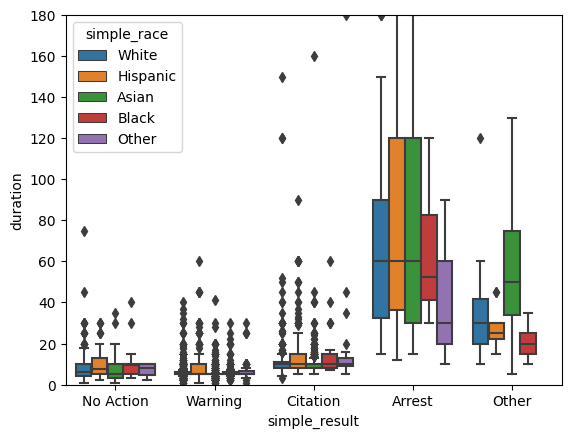

In [13]:
ax = sns.boxplot(data=ripa2023, x="simple_result", y="duration", hue="simple_race",
                 order=["No Action", "Warning", "Citation", "Arrest", "Other"]);
ax.set_ylim([0, 180])

(0.0, 120.0)

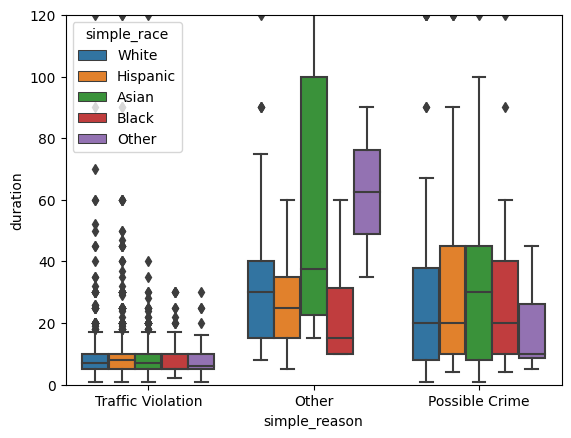

In [14]:
ax=sns.boxplot(data=ripa2023, x="simple_reason", y="duration", hue="simple_race",
            )
ax.set_ylim([0, 120])